# Challenge 2 - Recommendation Engine. Part 2

What are the main characteristics of the **"hot videos"**?

In [1]:
# install packages if needed
list.of.packages <- c("dplyr","lubridate","ggplot2")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "http://cran.us.r-project.org")

In [3]:
library(dplyr)
library(lubridate)
library(readr)
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=3)

### load the csv files

In [4]:
# Table 1: video_classified
video_classified <- read_csv("data/challenge_2/video_classified.csv", col_types = cols(date = col_character()))

# Table 2: video_features
video_features <- read_csv("data/challenge_2/video_features.csv", col_types = cols(video_upload_date = col_character()))

## Third target: Describe video types
* What are the main characteristics of the "hot videos"?


### Joining video_classified with video_features

In [5]:
# getting the videos features
video_classified_features <- video_classified%>%
                             inner_join(
                                 video_features,
                                 by="video_id"
                             )
# taking a look at the dataframe structure
video_classified_features%>%glimpse()

Observations: 41,775
Variables: 14
$ video_id          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2...
$ count             <int> 65907, 44774, 94821, 140460, 129082, 19382, 78503...
$ date              <chr> "2015-01-08", "2015-01-11", "2015-01-05", "2015-0...
$ overall_count     <int> 1059534, 1059534, 1059534, 1059534, 1059534, 1059...
$ is_popular        <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ day               <int> 8, 11, 5, 1, 2, 15, 7, 3, 4, 12, 10, 13, 9, 14, 6...
$ count_norm        <dbl> 6.379590, 3.936025, 9.722856, 15.000000, 13.68438...
$ angular_coef      <dbl> -0.9988875, -0.9988875, -0.9988875, -0.9988875, -...
$ angle             <dbl> -44.96811, -44.96811, -44.96811, -44.96811, -44.9...
$ classification    <chr> "Everything else", "Everything else", "Everything...
$ video_length      <int> 1496, 1496, 1496, 1496, 1496, 1496, 1496, 1496, 1...
$ video_language    <chr> "Es", "Es", "Es", "Es", "Es", "Es", "Es", "Es", "...
$ video_upload_da

### Video Classification versus Language

1. Classification X Language

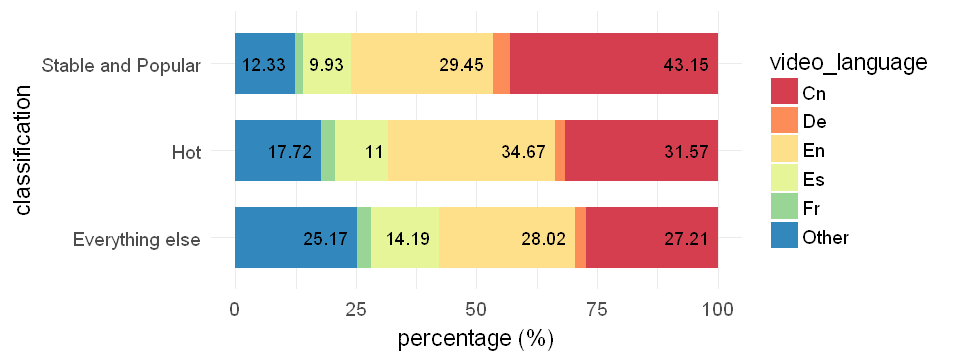

In [6]:
# aggregating and scaling videos for classification and language
video_classification_language <- video_classified_features %>% 
                                 group_by(classification, video_language) %>% 
                                 summarise(count=n()) %>% 
                                 mutate(perc=count/sum(count))

# plotting as a barchart
ggplot(video_classification_language, aes(x = factor(classification), y = perc*100, fill = factor(video_language))) +
    geom_bar(stat="identity", width = 0.7) +
    labs(x = "classification", y = "percentage (%)", fill = "video_language") +
    geom_text(aes(label = round(perc*100, digits=2)), position = position_stack(), vjust = 0.5, hjust=1.2,check_overlap = TRUE) + 
    theme_minimal(base_size = 14) +
    scale_fill_brewer(palette="Spectral") +
    coord_flip()

<span style="color:red">We can see that the "Hot" group has proportionally more videos in English (34.67%). In relation to the other languages it is the middle class. We can affirm that the proportion of videos with English language is a characteristic that differs from the others.
</span>

<ol start="2">
  <li> Language X Classification</li>
</ol>

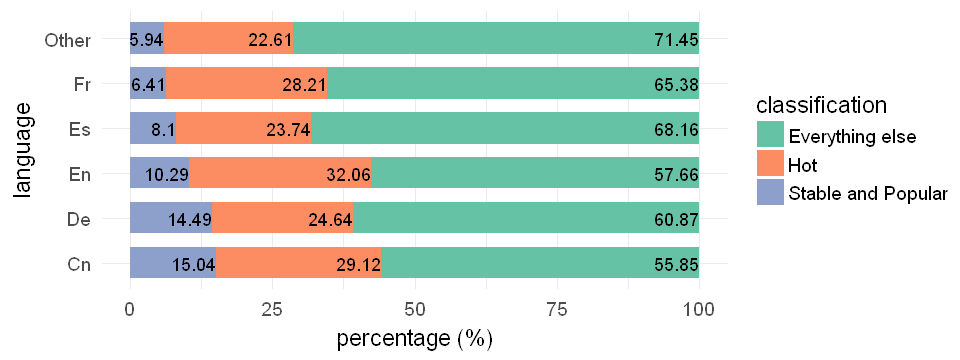

In [7]:
# aggregating and scaling videos for language and classification 
video_classification_language <- video_classified_features %>% 
                                 group_by(video_language, classification) %>% 
                                 summarise(count=n()) %>% 
                                 mutate(perc=count/sum(count))

# plotting as a barchart
ggplot(video_classification_language, aes(x = factor(video_language), y = perc*100, fill = factor(classification))) +
    geom_bar(stat="identity", width = 0.7) +
    labs(x = "language", y = "percentage (%)", fill = "classification") +
    geom_text(aes(label = round(perc*100, digits=2)), position = position_stack(), vjust = 0.5, hjust=1,check_overlap = TRUE) + 
    theme_minimal(base_size = 14) +
    scale_fill_brewer(palette="Set2") +
    coord_flip()


<span style="color:red">Again, we can see the large presence of the group "Hot" videos in English.
Videos from other languages (Others) are those that have the least amount of "Hot" and "Stable and Popular" videos, proportionally.
</span>

### Video Classification versus Quality

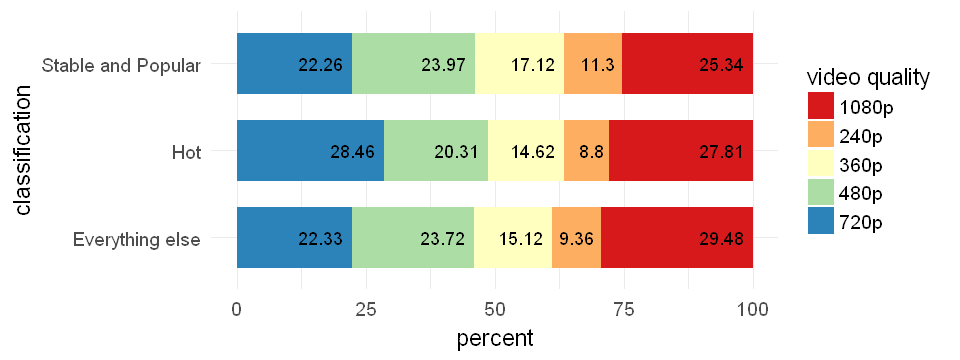

In [8]:
# aggregating and scaling videos for classification and quality
video_classification_language <- video_classified_features %>% 
                                 group_by(classification, video_quality) %>% 
                                 summarise(count=n()) %>% 
                                 mutate(perc=count/sum(count))

# plotting as a barchart
ggplot(video_classification_language, aes(x = factor(classification), y = perc*100, fill = factor(video_quality))) +
    geom_bar(stat="identity", width = 0.7) +
    labs(x = "classification", y = "percent", fill = "video quality") +
    geom_text(aes(label = round(perc*100, digits=2)), position = position_stack(), vjust = 0.5, hjust=1.2,check_overlap = TRUE) + 
    theme_minimal(base_size = 14) +
    scale_fill_brewer(palette="Spectral") +
    coord_flip()

<span style="color:red">
The group "Hot" has the most videos between 1080p and 720p (28% and 27%, respectively), we have 420p videos only in third place.
Compared with other classes, we can also see that the "Hot" group has proportionally fewer low quality videos (between 480p and 240p) and more high quality videos (1080p and 720p).</span>

### Video Classification versus Length

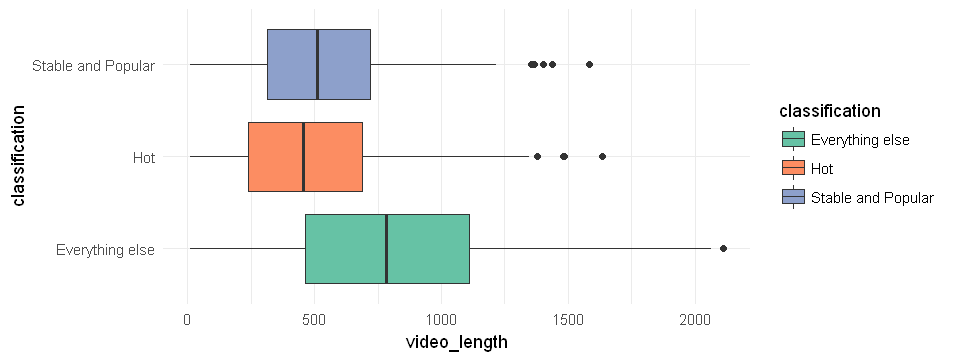

In [9]:
# plotting as a boxplot
ggplot(video_classified_features, aes(x = classification, y = video_length, fill = classification)) +
    geom_boxplot() +
    theme_minimal() +
    coord_flip() +
    scale_fill_brewer(palette = "Set2")

<span style="color:red">The videos from the "Hot" and "Stable and Popular" groups are very similar in relation to the duration of the videos. Compared with "Everything else", the "Hot" videos are 70% smaller compared to their medians.
</span>

### Let's add the age (in days) of the videos  

In [10]:
# last date in the dataset
max_date <- max(video_classified_features$date)

# getting the age in days of the videos
video_classified_features <- video_classified_features%>%
                            mutate(
                                age_days = as.integer(difftime(as.Date(max_date),as.Date(video_upload_date), units="days"))
                            )

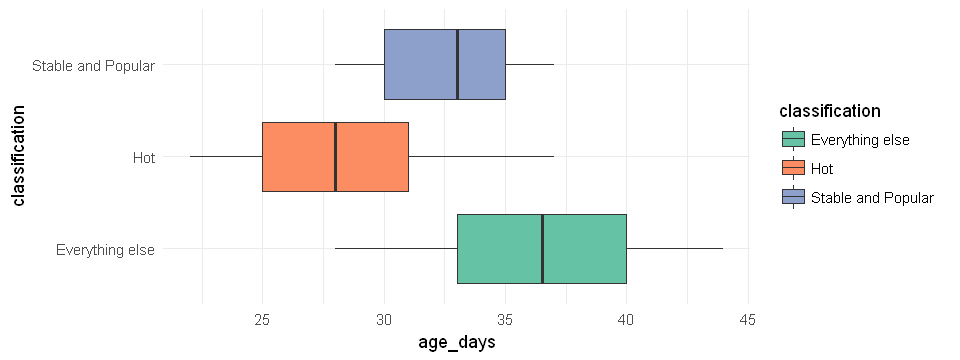

In [11]:
# plotting as a boxplot
ggplot(video_classified_features, aes(x = classification, y = age_days, fill = classification)) +
    geom_boxplot() +
    theme_minimal() +
    coord_flip() +
    scale_fill_brewer(palette = "Set2")

<span style="color:red">
We do not have a wide variety of ages for the videos, but we can see that the "Hot" and "Stable and Popular" groups have videos with release dates prior to the "Everything else".
</span>

### Resume the characteristics of the "hot videos"

The videos classified as hot, are generally videos of good quality (1080-480p). Compared to other classes, it has the highest proportion of videos in English (~ 34%), on average shorter videos, comparable to the "stable and popular". 
In comparison to age (publication day), the hot videos are in average a few days more recent than the others (28 days).
* “Hot”, “Stable and Popular” are in general short videos with good video quality
* Videos in English are the most “Hot” videos, and Chinese videos are usually the most "Stable and Popular"


## Forth Target: Identify an opportunity
After having identified the characteristics of the hot videos, how would you use this information from a product standpoint?

I believe that with the information of the most important characteristics of some types of videos, the company could automate the selection of videos from the homepage for new users, highlighting videos that have similar characteristics with "HOT" and "Stable and popular" such as short videos with good video quality or prioritize videos in English (classified as hot) or Chinese (stable and popular). This approach could also help in the selection and ranking of new videos that are published. However we must always be careful about the impact and bias that this type of approach may entail.